### Analysis of a dataset on various attributes that describe the quality of the Wine

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv("winequality_white.csv")
data.shape

In [2]:
data = data.drop(['citric acid','quality'], axis=1, inplace = False)

In [3]:
np.isfinite(data).count()

fixed acidity           4898
volatile acidity        4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
dtype: int64

In [4]:
pd.isna(data).count()

fixed acidity           4898
volatile acidity        4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
dtype: int64

**The dataset is composed of ten important product categories: 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates' and 'alcohol'. Consider what each category represents in terms of products you could purchase.**

In [5]:
# Display a description of the dataset
data.describe()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [6]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [3548,2578,1459]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.2,0.47,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.3
1,5.8,0.30,1.7,0.014,45.0,104.0,0.98914,3.40,0.56,12.6
2,7.9,0.11,4.5,0.048,27.0,133.0,0.99460,3.24,0.42,10.6


**Mean:**
* fixed acidity   : 6.854788
* volatile acidity: 0.278241
* residual sugar  : 6.391415
* chlorides       : 0.045772
* free sulfur dioxide : 35.308085
* total sulfur dioxide: 138.360657
* density         : 0.994027
* pH              : 3.188267
* sulphates       : 0.489847
* alcohol         : 10.514267

In [7]:
#data = pd.read_csv("winequality_white.csv")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['sulphates'], axis=1, inplace = False)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data['sulphates'],test_size=0.25, random_state=20)


# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=20)
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print (score)

-0.13568734413689265


In [9]:
new_data.head() ### Not in the Original Code ###

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
0,7.0,0.27,20.7,0.045,45.0,170.0,1.0010,3.00,8.8
1,6.3,0.30,1.6,0.049,14.0,132.0,0.9940,3.30,9.5
2,8.1,0.28,6.9,0.050,30.0,97.0,0.9951,3.26,10.1
3,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,9.9
4,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,9.9


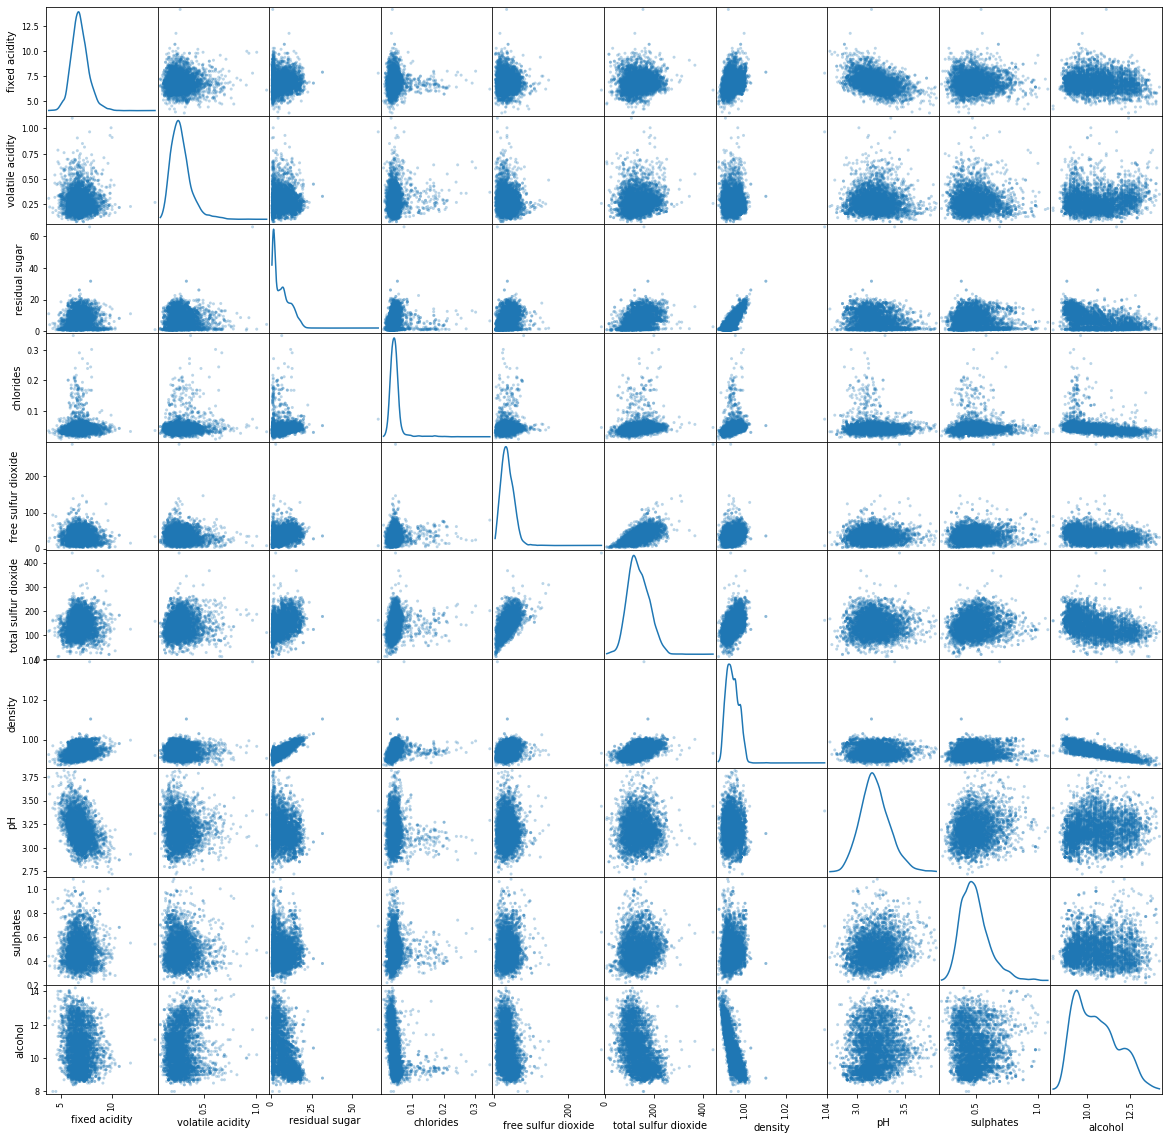

In [10]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (20,20), diagonal = 'kde');

In [11]:
data.corr() ### Not in the Original Code ###

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
residual sugar,0.089021,0.064286,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433
alcohol,-0.120881,0.067718,-0.450631,-0.360189,-0.250104,-0.448892,-0.780138,0.121432,-0.017433,1.000000


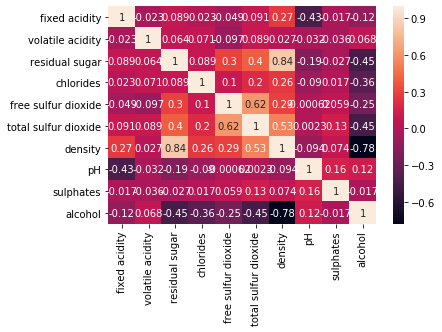

In [12]:
import seaborn as sns ### Not in the Original Code ###
sns.heatmap(data.corr(), annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

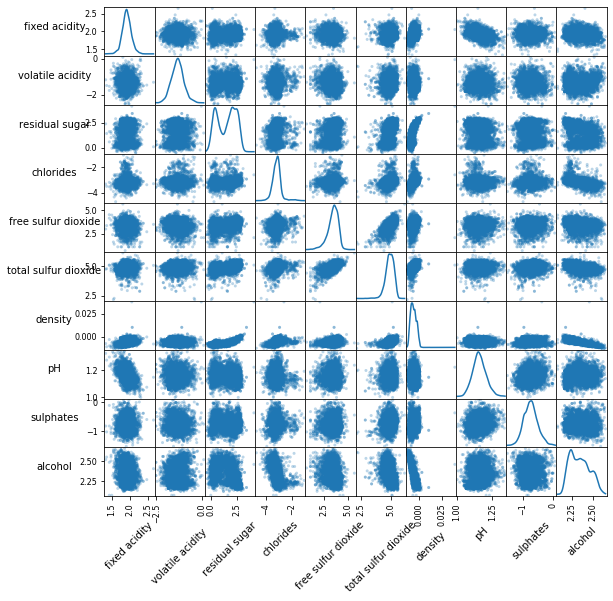

In [45]:
#np.seterr(divide = 'ignore') ### NOT IN THE MAIN CODE ###
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
sm = pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (9,9), diagonal = 'kde');

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
plt.show

In [14]:
# Display the log-transformed sample data
display(log_samples)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.824549,-0.755023,2.116256,-3.540459,3.178054,4.955827,-0.008032,1.169381,-0.798508,2.509599
1,1.757858,-1.203973,0.530628,-4.268698,3.806662,4.644391,-0.010919,1.223775,-0.579818,2.533697
2,2.066863,-2.207275,1.504077,-3.036554,3.295837,4.890349,-0.005415,1.175573,-0.867501,2.360854


In [15]:
np.isfinite(log_data).head(2)### NOT IN THE ORIGINAL CODE###

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True


In [16]:
log_data.head()### NOT IN THE ORIGINAL CODE###

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.945910,-1.309333,3.030134,-3.101093,3.806662,5.135798,0.001000,1.098612,-0.798508,2.174752
1,1.840550,-1.203973,0.470004,-3.015935,2.639057,4.882802,-0.006018,1.193922,-0.713350,2.251292
2,2.091864,-1.272966,1.931521,-2.995732,3.401197,4.574711,-0.004912,1.181727,-0.820981,2.312535
3,1.974081,-1.469676,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535
4,1.974081,-1.469676,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535


In [17]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = [65,66,75,128,154]

# Remove the outliers, if any were specified
good_data = log_data#.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
98,2.282382,-1.021651,2.351375,-3.270169,1.386294,4.418841,-0.004410,1.061257,-1.203973,2.312535
169,2.282382,-0.867501,2.287471,-3.381395,1.609438,4.700480,-0.004209,1.054312,-1.237874,2.302585
207,2.322388,-0.820981,1.824549,-3.015935,2.995732,4.820282,-0.003205,1.095273,-0.673345,2.292535
311,1.609438,-0.597837,2.116256,-3.442019,3.555348,5.099866,-0.008234,1.261298,-0.673345,2.525729
358,2.302585,-1.609438,0.336472,-2.995732,2.944439,5.023881,-0.006018,1.098612,-0.867501,2.341806
386,1.609438,-1.771957,0.405465,-3.649659,3.178054,4.744932,-0.009444,1.247032,-0.941609,2.379546
551,2.219203,-1.386294,0.182322,-3.649659,3.433987,4.532599,-0.008435,1.075002,-0.994252,2.424803
555,2.219203,-1.386294,0.182322,-3.649659,3.433987,4.532599,-0.008435,1.075002,-0.994252,2.424803
763,1.609438,-0.820981,2.923162,-3.244194,3.637586,4.852030,-0.001501,1.214913,-0.562119,2.322388
847,2.219203,-1.078810,0.182322,-3.649659,2.833213,4.290459,-0.007931,1.124930,-0.941609,2.379546


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
17,1.824549,-0.415515,0.182322,-3.540459,3.367296,4.317488,-0.010859,1.202972,-0.941609,2.549445
20,1.824549,-0.415515,0.182322,-3.540459,3.367296,4.317488,-0.010859,1.202972,-0.941609,2.549445
23,2.028148,-0.400478,0.405465,-2.603690,3.218876,5.123964,-0.006320,1.115142,-0.673345,2.230014
178,1.791759,-0.400478,0.182322,-2.813411,2.197225,4.682131,-0.006924,1.134623,-1.049822,2.163323
221,1.974081,-0.378336,2.251292,-2.659260,3.496508,5.147494,-0.002904,1.098612,-0.597837,2.208274
230,1.916923,-0.446287,2.272126,-2.780621,3.258097,4.955827,-0.002804,1.214913,-0.776529,2.186051
320,1.791759,-2.302585,0.095310,-3.194183,2.708050,4.174387,-0.007327,1.283708,-0.494296,2.332144
372,1.887070,-0.099820,-0.223144,-3.036554,2.833213,5.318120,-0.006622,1.205971,-0.579818,2.302585
508,1.774952,-0.478036,1.252763,-3.244194,4.007333,5.023881,-0.009344,1.235471,-0.820981,2.484907
530,1.856298,-2.302585,1.589235,-3.036554,3.433987,4.634729,-0.005314,1.232560,-0.235722,2.272126


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
40,1.902108,-1.469676,0.916291,-1.760261,4.143135,5.062595,-0.006320,1.134623,-1.021651,2.240710
41,1.902108,-1.427116,1.064711,-1.754464,4.143135,5.056246,-0.006320,1.131402,-1.078810,2.240710
54,1.916923,-1.609438,-0.105361,-1.917323,3.637586,4.882802,-0.007025,1.115142,-0.967584,2.208274
60,1.916923,-1.514128,1.589235,-2.385967,3.401197,4.812184,-0.004912,1.108563,-0.776529,2.151762
110,1.871802,-1.771957,2.140066,-2.501036,4.158883,5.093750,-0.004108,1.061257,-0.941609,2.174752
124,1.856298,-2.040221,0.470004,-2.385967,3.688879,5.062595,-0.007226,1.166271,-1.021651,2.282382
130,1.740466,-1.347074,2.341806,-3.912023,1.945910,4.043051,-0.006018,1.220830,-0.994252,2.360854
194,1.856298,-1.237874,1.280934,-1.609438,4.317488,5.198497,-0.005817,1.105257,-0.891598,2.208274
195,1.856298,-1.203973,1.252763,-1.624552,4.330733,5.192957,-0.005817,1.105257,-0.941609,2.208274
196,1.856298,-1.237874,1.280934,-1.624552,4.317488,5.209486,-0.005817,1.101940,-0.967584,2.208274


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
31,2.116256,-1.966113,0.095310,-3.170086,1.945910,3.850148,-0.006622,1.244155,-0.916291,2.322388
98,2.282382,-1.021651,2.351375,-3.270169,1.386294,4.418841,-0.004410,1.061257,-1.203973,2.312535
115,1.704748,-0.723606,0.405465,-2.733368,2.079442,4.634729,-0.006018,1.289233,-0.916291,2.272126
130,1.740466,-1.347074,2.341806,-3.912023,1.945910,4.043051,-0.006018,1.220830,-0.994252,2.360854
169,2.282382,-0.867501,2.287471,-3.381395,1.609438,4.700480,-0.004209,1.054312,-1.237874,2.302585
172,2.028148,-0.733969,-0.223144,-3.296837,1.386294,4.605170,-0.009848,1.108563,-0.941609,2.433613
253,1.757858,-1.427116,1.252763,-3.540459,1.609438,4.691348,-0.008738,1.261298,-0.843970,2.459589
256,1.840550,-1.049822,1.740466,-3.352407,2.079442,4.574711,-0.007327,1.184790,-0.891598,2.397895
257,1.840550,-1.049822,1.740466,-3.352407,2.079442,4.574711,-0.007327,1.184790,-0.891598,2.397895
259,1.757858,-1.021651,-0.105361,-3.296837,1.098612,4.317488,-0.009646,1.187843,-1.078810,2.433613


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
31,2.116256,-1.966113,0.095310,-3.170086,1.945910,3.850148,-0.006622,1.244155,-0.916291,2.322388
513,2.001480,-1.021651,0.336472,-3.688879,3.295837,4.007333,-0.008536,1.166271,-1.108663,2.415914
519,1.974081,-1.078810,2.533697,-3.036554,1.945910,3.713572,-0.005817,1.160021,-0.916291,2.459589
526,1.974081,-1.171183,1.609438,-3.218876,1.098612,3.367296,-0.009444,1.111858,-0.634878,2.525729
566,1.974081,-1.049822,2.517696,-2.975930,1.791759,3.610918,-0.005616,1.141033,-0.941609,2.442347
599,1.931521,-1.660731,0.336472,-3.324236,2.639057,4.007333,-0.009142,1.124930,-0.385662,2.442347
705,2.151762,-1.309333,1.808289,-3.442019,2.564949,3.713572,-0.007025,1.061257,-1.078810,2.388763
732,2.174752,-1.272966,1.791759,-3.816713,2.639057,3.891820,-0.006622,1.101940,-1.108663,2.406945
740,1.931521,-0.941609,1.526056,-3.816713,1.609438,2.944439,-0.008536,1.196948,-0.994252,2.533697
767,1.916923,-1.609438,0.470004,-3.575551,1.945910,3.828641,-0.008284,1.166271,-0.510826,2.388763


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1653,2.066863,-1.108663,3.453157,-2.937463,3.555348,5.170484,0.010247,1.147402,-0.967584,2.174752
1663,2.066863,-1.108663,3.453157,-2.937463,3.555348,5.170484,0.010247,1.147402,-0.967584,2.174752
2781,2.054124,-0.035627,4.186620,-2.603690,2.079442,5.075174,0.038239,1.220830,-0.371064,2.459589
3619,1.916923,-0.798508,3.260018,-3.473768,3.295837,4.804021,0.002946,1.118415,-0.867501,2.360854
3623,1.916923,-0.798508,3.260018,-3.473768,3.295837,4.804021,0.002946,1.118415,-0.867501,2.360854


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
72,1.791759,-1.309333,1.568616,-2.764621,3.433987,5.303305,-0.003606,1.305626,-0.342490,2.302585
115,1.704748,-0.723606,0.405465,-2.733368,2.079442,4.634729,-0.006018,1.289233,-0.916291,2.272126
250,1.774952,-1.560648,1.526056,-2.937463,3.688879,5.293305,-0.003606,1.313724,-0.356675,2.302585
320,1.791759,-2.302585,0.095310,-3.194183,2.708050,4.174387,-0.007327,1.283708,-0.494296,2.332144
507,1.791759,-1.427116,0.641854,-3.036554,3.688879,5.135798,-0.006219,1.291984,-0.616186,2.302585
509,1.791759,-1.427116,0.641854,-3.036554,3.688879,5.135798,-0.006219,1.291984,-0.616186,2.302585
830,1.987874,-1.584745,0.530628,-2.813411,3.526361,4.700480,-0.003707,1.313724,-0.371064,2.351375
834,1.987874,-1.584745,0.530628,-2.813411,3.526361,4.700480,-0.003707,1.313724,-0.371064,2.351375
1014,1.808289,-1.832581,2.533697,-2.748872,4.143135,5.087596,-0.000600,1.297463,-0.843970,2.186051
1095,1.667707,-1.427116,0.262364,-3.411248,3.218876,4.574711,-0.009444,1.278152,-0.967584,2.397895


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
758,1.960095,-1.966113,0.182322,-2.975930,4.007333,4.912655,-0.006823,1.193922,-0.040822,2.282382
759,1.960095,-2.040221,0.182322,-3.057608,3.988984,4.897840,-0.006823,1.193922,-0.030459,2.282382
852,1.931521,-1.714798,0.262364,-3.324236,3.688879,4.762174,-0.006622,1.184790,-0.051293,2.251292
854,1.931521,-1.714798,0.262364,-3.324236,3.688879,4.762174,-0.006622,1.184790,-0.051293,2.251292
866,1.931521,-1.714798,0.262364,-3.324236,3.688879,4.762174,-0.006622,1.184790,-0.051293,2.251292
974,1.960095,-2.040221,0.587787,-3.079114,2.639057,4.736198,-0.007528,1.199965,-0.105361,2.459589
1016,1.916923,-0.994252,2.415914,-2.645075,3.784190,4.912655,-0.003205,1.091923,-0.127833,2.219203
1036,2.014903,-1.771957,0.405465,-2.813411,2.890372,4.317488,-0.006421,1.264127,-0.127833,2.370244
1126,1.871802,-2.162823,0.667829,-3.270169,4.290459,5.111988,-0.011061,1.137833,-1.386294,2.557227
1210,2.219203,-1.272966,0.000000,-3.170086,2.639057,4.077537,-0.007831,1.085189,-1.386294,2.351375


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [18]:
good_data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.945910,-1.309333,3.030134,-3.101093,3.806662,5.135798,0.001000,1.098612,-0.798508,2.174752
1,1.840550,-1.203973,0.470004,-3.015935,2.639057,4.882802,-0.006018,1.193922,-0.713350,2.251292
2,2.091864,-1.272966,1.931521,-2.995732,3.401197,4.574711,-0.004912,1.181727,-0.820981,2.312535
3,1.974081,-1.469676,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535
4,1.974081,-1.469676,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535


In [19]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=10).fit(good_data)

In [20]:
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

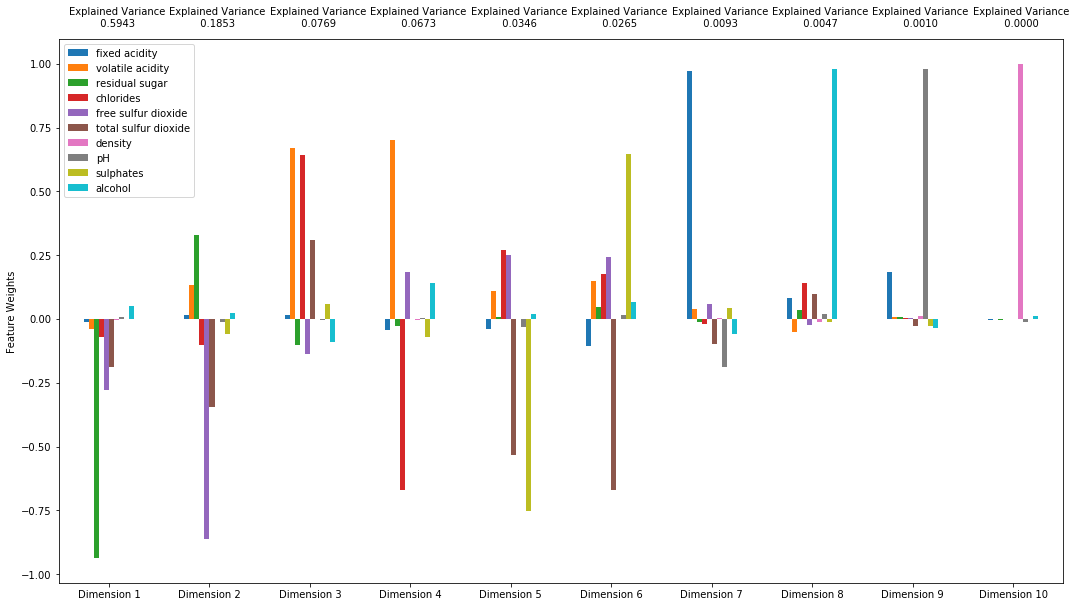

In [21]:
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [22]:
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Dimension 1,0.5943,-0.0098,-0.0392,-0.9366,-0.0692,-0.2791,-0.1887,-0.0024,0.0076,-0.0006,0.0531
Dimension 2,0.1853,0.0148,0.1339,0.3288,-0.1005,-0.8614,-0.3432,0.0002,-0.0113,-0.0574,0.0224
Dimension 3,0.0769,0.0148,0.6719,-0.1018,0.6420,-0.1381,0.3079,0.0015,-0.0038,0.0609,-0.0903
Dimension 4,0.0673,-0.0414,0.7003,-0.0263,-0.6696,0.1847,-0.0007,-0.0025,0.0055,-0.0701,0.1403
Dimension 5,0.0346,-0.0395,0.1102,0.0094,0.2697,0.2511,-0.5309,-0.0015,-0.0311,-0.7531,0.0194
Dimension 6,0.0265,-0.1057,0.1496,0.0477,0.1761,0.2448,-0.6709,-0.0010,0.0175,0.6467,0.0681
Dimension 7,0.0093,0.9719,0.0402,-0.0126,-0.0200,0.0579,-0.0989,0.0043,-0.1860,0.0428,-0.0598
Dimension 8,0.0047,0.0815,-0.0491,0.0336,0.1425,-0.0226,0.0968,-0.0128,0.0210,-0.0114,0.9792
Dimension 9,0.0010,0.1835,0.0100,0.0071,0.0042,0.0058,-0.0270,0.0117,0.9815,-0.0271,-0.0340
Dimension 10,0.0000,-0.0056,-0.0000,-0.0018,-0.0003,0.0002,-0.0004,0.9998,-0.0104,-0.0008,0.0139


pandas.core.frame.DataFrame

Dimension 1     0.5943
Dimension 2     0.7796
Dimension 3     0.8565
Dimension 4     0.9238
Dimension 5     0.9584
Dimension 6     0.9849
Dimension 7     0.9942
Dimension 8     0.9989
Dimension 9     0.9999
Dimension 10    0.9999
Name: Explained Variance, dtype: float64

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9,Dimension 10
0,-0.5240,0.5264,0.1150,0.6369,-0.0899,-0.0836,-0.1041,0.1038,-0.0051,-0.0004
1,0.9145,-0.4301,-0.6656,0.9593,-0.1907,0.1593,-0.0873,-0.0588,0.0225,-0.0000
2,0.0406,0.0052,-0.4986,-0.7057,-0.0161,-0.2489,0.0888,0.0923,0.0381,-0.0002


In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [25]:
reduced_data.head()

,Dimension 1,Dimension 2
0,-1.617566,0.100302
1,1.149611,0.350929
2,-0.371721,0.280795
3,-0.817820,-0.298501
4,-0.817820,-0.298501


In [26]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.5240,0.5264
1,0.9145,-0.4301
2,0.0406,0.0052


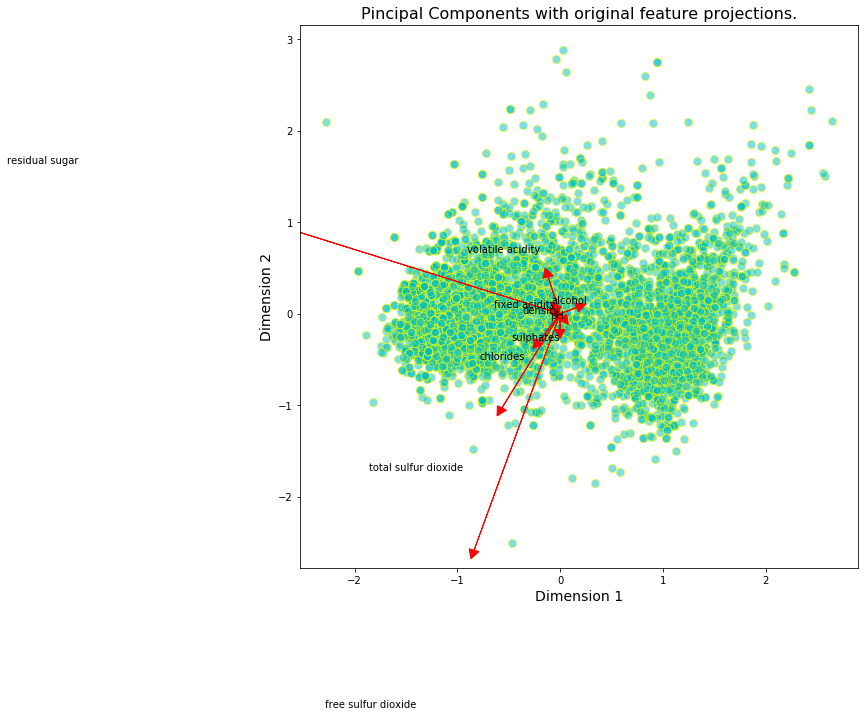

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
    # scatterplot of the reduced data    
ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors='c', edgecolors='yellow', s=70, alpha=0.5)
    
feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
arrow_size, text_pos =3,5

    # projections of the original features
for i, v in enumerate(feature_vectors):
    ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], 
                  head_width=0.1, head_length=0.1, linewidth=1, color='red')
    ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black', 
                  ha='right',va='baseline', fontsize=10)

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)
ax.set_title("Pincipal Components with original feature projections.", fontsize=16);


In [28]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print (score)



0.526994206249568


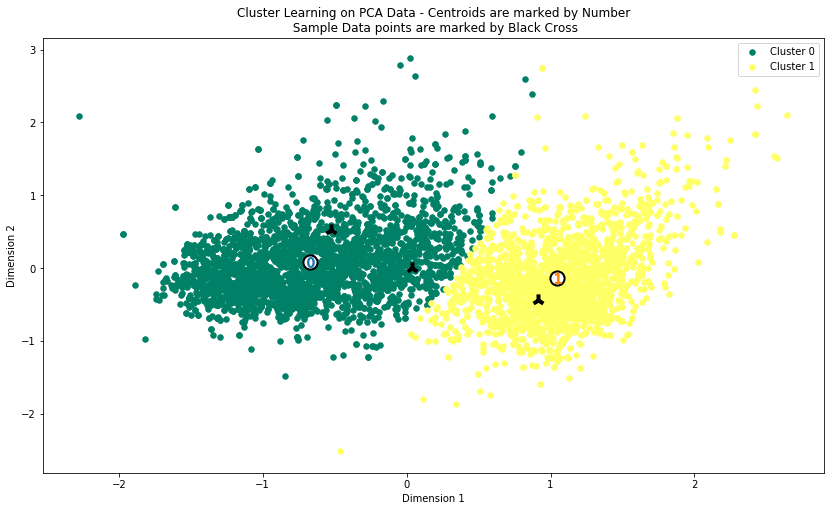

In [61]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
predictions = pd.DataFrame(preds, columns = ['Cluster'])
plot_data = pd.concat([predictions, reduced_data], axis = 1)

# Generate the cluster plot
fig, ax = plt.subplots(figsize = (14,8))

# Color map
cmap = cm.get_cmap('summer')

# Color the points based on assigned cluster
for i, cluster in plot_data.groupby('Cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

# Plot centers with indicators
for i, c in enumerate(centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
               alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

# Plot transformed sample points 
ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
           s = 150, linewidth = 4, color = 'black', marker = '2');

# Set plot title
ax.set_title("Cluster Learning on PCA Data - Centroids are marked by Number\n Sample Data points are marked by Black Cross");
